# Определение перспективного тарифа для телеком-компании

## Описание проекта: 

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<font size="4"><b>Описание тарифов</b></font><br/><br/>
<b>Тариф <font color=#0F74F1><b>Смарт</b></font></b>:
* 1. Ежемесячная плата: 550 рублей
* 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

<b>Тариф <font color=#20B605><b>Ультра</b></font></b>:
* 1. Ежемесячная плата: 1950 рублей
* 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
<br/>


<font size="2">  
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
</font>

<font size="4"><b>Описание данных</b></font><br/>

Таблица <font size="3"><b>users</b></font> (информация о пользователях):
* <b>user_id</b> — уникальный идентификатор пользователя
* <b>first_name</b> — имя пользователя
* <b>last_name</b> — фамилия пользователя
* <b>age</b> — возраст пользователя (годы)
* <b>reg_date</b> — дата подключения тарифа (день, месяц, год)
* <b>churn_date</b> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <b>city</b> — город проживания пользователя
* <b>tariff</b> — название тарифного плана

Таблица <font size="3"><b>calls</b></font> (информация о звонках):
* <b>id</b> — уникальный номер звонка
* <b>call_date</b> — дата звонка
* <b>duration</b> — длительность звонка в минутах
* <b>user_id</b> — идентификатор пользователя, сделавшего звонок

Таблица <font size="3"><b>messages</b></font> (информация о сообщениях):
* <b>id</b> — уникальный номер сообщения
* <b>message_date</b> — дата сообщения
* <b>user_id</b> — идентификатор пользователя, отправившего сообщение

Таблица <font size="3"><b>internet</b></font> (информация об интернет-сессиях):
* <b>id</b> — уникальный номер сессии
* <b>mb_used</b> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <b>session_date</b> — дата интернет-сессии
* <b>user_id</b> — идентификатор пользователя

Таблица <font size="3"><b>tariffs</b></font> (информация о тарифах):
* <b>tariff_name</b> — название тарифа
* <b>rub_monthly_fee</b> — ежемесячная абонентская плата в рублях
* <b>minutes_included</b> — количество минут разговора в месяц, включённых в абонентскую плату
* <b>messages_included</b> — количество сообщений в месяц, включённых в абонентскую плату
* <b>mb_per_month_included</b> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* <b>rub_per_minute</b> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* <b>rub_per_message</b> — стоимость отправки сообщения сверх тарифного пакета
* <b>rub_per_gb</b> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Новый раздел

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats as st

 ## Ознакомление с данными:

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv') 

### Просмотрим общиую информацию в таблицах и почистим данные.

In [3]:
def info_df(i): # Напишу коротенькую функцию для вывода предварительной информации о данных.
    return i.head(), i.info()

#### Users

In [4]:
info_df(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(   user_id  age churn_date         city first_name  last_name    reg_date  \
 0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
 1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
 2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
 3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
 4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   
 
   tariff  
 0  ultra  
 1  smart  
 2  smart  
 3  ultra  
 4  ultra  ,
 None)

Проверим уникальность:

In [5]:
print('Количество уникальных строк: ', users['user_id'].count())

Количество уникальных строк:  500


In [6]:
users.isna().sum() 

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Значение уникальных строк совпадает с общем количеством строк в датафрейме, делаем вывод что каждый пользователь уникальный.

Пропуски присутствуют только в столбце 'churn_date' в методичке есть описание этих пропусков. (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Оставим этот столбец как есть.

В предобработке этой таблицы необходимо заменить столбец 'reg_date' на datetime. 

#### calls

In [7]:
info_df(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(       id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 None)

In [8]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [9]:
print('Количество уникальных строк: ', calls['id'].count())

Количество уникальных строк:  202607


Все совпадает. Так же необходимо изменить тип колонки 'call_date' 

Посмотрим на распределение времени звонков.

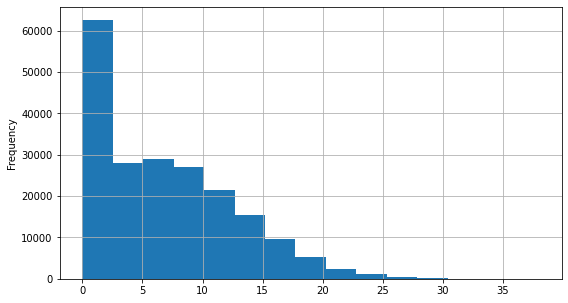

In [10]:
calls['duration'].plot(kind='hist',bins =15 ,figsize=(9,5), grid=True);

Очень много около нулевых значений, посмотрим на них, в описании написанно что мегалайн округляет значения звонков в большую сторону («Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.) Проверим какие есть значения меньше еденицы.

In [11]:
calls.query('0 < duration < 1')

,id,call_date,duration,user_id
55,1000_55,2018-09-19,0.31,1000
65,1000_65,2018-10-28,0.34,1000
97,1000_97,2018-10-26,0.33,1000
122,1000_122,2018-10-07,0.13,1000
135,1000_135,2018-10-25,0.02,1000
...,...,...,...,...
202484,1499_97,2018-12-22,0.07,1499
202537,1499_150,2018-12-09,0.56,1499
202545,1499_158,2018-11-16,0.64,1499
202579,1499_192,2018-12-07,0.76,1499


Данные не округлены, округлим согласно правилу «Мегалайн»

In [12]:
calls['duration'] = calls['duration'].apply(np.ceil)

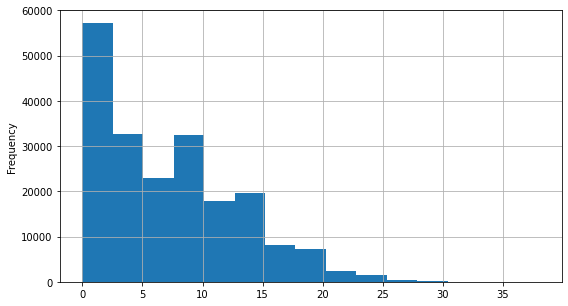

In [13]:
calls['duration'].plot(kind ='hist',bins =15 ,figsize=(9,5), grid=True); # Повторно посмотрим на данные

In [14]:
calls.query('duration == 0.0') # Посмотрим на нулевые значения в данных.

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Их 39613, не мало, но опять же в методичке есть примечание на этот случай   " В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. "    Так что и их тоже оставляем в покое.

#### messages

In [15]:
info_df(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


(       id message_date  user_id
 0  1000_0   2018-06-27     1000
 1  1000_1   2018-10-08     1000
 2  1000_2   2018-08-04     1000
 3  1000_3   2018-06-16     1000
 4  1000_4   2018-12-05     1000,
 None)

Данные без пропусков. Заменить тип данных в столбце 'message_date'

#### internet

In [16]:
info_df(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


(   Unnamed: 0      id  mb_used session_date  user_id
 0           0  1000_0   112.95   2018-11-25     1000
 1           1  1000_1  1052.81   2018-09-07     1000
 2           2  1000_2  1197.26   2018-06-25     1000
 3           3  1000_3   550.27   2018-08-22     1000
 4           4  1000_4   302.56   2018-09-24     1000,
 None)

Пропуски отсутствуют, также заменить тип данных в колонке с датой. 

Посмотрим на гистограмму распределения интерент трафика в колонке 'mb_used'.

<AxesSubplot:>

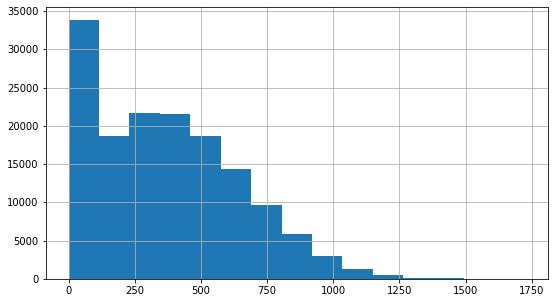

In [17]:
internet['mb_used'].hist( bins =15 ,figsize=(9,5))

Условия таковы что при разгворе длиной 1 секунда занчения округляются до 1 минуты, тоже и с интенет трафиком, округлим.

In [18]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [19]:
internet.query('mb_used == 0.0') # Посмотрим на нулевые значения.

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Строк с нулевыми значениями почти 20000 так как в услвиях ничего не сказанно про эти данные, как про звонки, я удалю эти строки из таблицы.

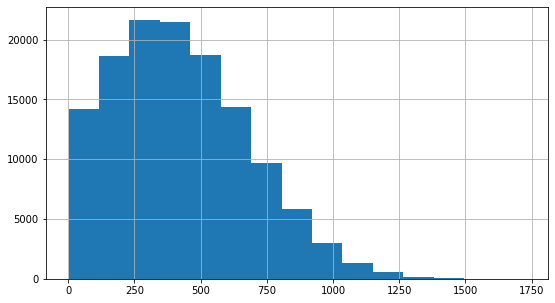

In [20]:
internet = internet.query('mb_used != 0.0')
internet['mb_used'].hist(bins =15 ,figsize=(9,5));

#### tariffs

In [21]:
info_df(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


(   messages_included  mb_per_month_included  minutes_included  \
 0                 50                  15360               500   
 1               1000                  30720              3000   
 
    rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
 0              550         200                3               3       smart  
 1             1950         150                1               1       ultra  ,
 None)

In [22]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут просто содержаться данные о тарифах.

#### Изменим тип данных:

In [23]:
def date_to_dt_month_season(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [24]:
date_to_dt_month_season([users, calls, messages, internet]) 

In [25]:
users.info() # Проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    129798 non-null  int64         
 1   id            129798 non-null  object        
 2   mb_used       129798 non-null  float64       
 3   session_date  129798 non-null  datetime64[ns]
 4   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


## Обеденим таблицы.

In [29]:
users_tariffs_data = users.merge(tariffs, left_on='tariff', right_on='tariff_name', how='outer')
users_calls_data = users_tariffs_data.merge(calls, on='user_id', how='outer')
users_messages_data = users_tariffs_data.merge(messages, on='user_id', how='outer')
users_internet_data = users_tariffs_data.merge(internet, on='user_id', how='outer')
df = users_calls_data.append([users_messages_data, users_internet_data], sort=True)

In [30]:
df.drop(['Unnamed: 0', 'tariff_name'], axis='columns', inplace=True) # Избавляемся от ненужных колонн

In [31]:
df.head()

,age,call_date,churn_date,city,duration,first_name,id,last_name,mb_per_month_included,mb_used,...,messages_included,minutes_included,reg_date,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,session_date,tariff,user_id
0,52,2018-07-25,NaN,Краснодар,0.0,Рафаил,1000_0,Верещагин,30720,NaN,...,1000,3000,2018-05-25,1950,150,1,1,NaT,ultra,1000
1,52,2018-08-17,NaN,Краснодар,0.0,Рафаил,1000_1,Верещагин,30720,NaN,...,1000,3000,2018-05-25,1950,150,1,1,NaT,ultra,1000
2,52,2018-06-11,NaN,Краснодар,3.0,Рафаил,1000_2,Верещагин,30720,NaN,...,1000,3000,2018-05-25,1950,150,1,1,NaT,ultra,1000
3,52,2018-09-21,NaN,Краснодар,14.0,Рафаил,1000_3,Верещагин,30720,NaN,...,1000,3000,2018-05-25,1950,150,1,1,NaT,ultra,1000
4,52,2018-12-15,NaN,Краснодар,6.0,Рафаил,1000_4,Верещагин,30720,NaN,...,1000,3000,2018-05-25,1950,150,1,1,NaT,ultra,1000


## Рассчеты для каждого пользователя.

<font size="4"><b>Посчитаем для каждого пользователя:</b></font><br/>


* <b>Количество сделанных звонков и израсходованных минут разговора по месяцам</b> 
* <b>Количество отправленных сообщений по месяцам;</b> 
* <b>Объем израсходованного интернет-трафика по месяцам</b> 
* <b>Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).</b>

### Звонки и минуты

In [32]:
df['call_in_mounth'] = df['call_date'].dt.month.fillna(0).astype(int) # Добавим в таблицу месяц совершения звонков.

Посчитаем и добавми в таблицу колличество сделанных звонков и минут разговора по месяцам.

In [33]:
call_stats = (df.groupby(['tariff', 'user_id', 'minutes_included', 'rub_per_minute', 'rub_monthly_fee',  'call_in_mounth', 'city'])['duration']
              .agg(['count', 'sum'])
              .reset_index()
              .query('call_in_mounth != 0'))
call_stats.head()

,tariff,user_id,minutes_included,rub_per_minute,rub_monthly_fee,call_in_mounth,city,count,sum
1,smart,1001,500,3,550,11,Москва,59,430.0
2,smart,1001,500,3,550,12,Москва,63,414.0
4,smart,1002,500,3,550,6,Стерлитамак,15,117.0
5,smart,1002,500,3,550,7,Стерлитамак,26,214.0
6,smart,1002,500,3,550,8,Стерлитамак,42,289.0


### Сообщения

Посчитаем и добавим в таблицу колличество отправленных сообщений по месяцам.

In [34]:
df['sms_in_month'] = df['message_date'].dt.month.fillna(0).astype(int)

In [35]:
messages_stats = (df
             .groupby(['tariff', 'user_id', 'messages_included', 'rub_per_message', 'rub_monthly_fee', 'sms_in_month', 'city'])['first_name']
             .agg('count')
             .reset_index()
             .query('sms_in_month != 0')
)
message_stat = messages_stats.rename(columns={"first_name": "mes_count"})
message_stat.head()

,tariff,user_id,messages_included,rub_per_message,rub_monthly_fee,sms_in_month,city,mes_count
2,smart,1002,50,3,550,6,Стерлитамак,4
3,smart,1002,50,3,550,7,Стерлитамак,11
4,smart,1002,50,3,550,8,Стерлитамак,13
5,smart,1002,50,3,550,9,Стерлитамак,4
6,smart,1002,50,3,550,10,Стерлитамак,10


### Интернет

Тоже проделаем для интернета

In [36]:
df['internet_month'] = df['session_date'].dt.month.fillna(0).astype(int)

In [37]:
internet_stats = (df.groupby(['tariff', 'user_id', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee', 'internet_month', 'city'])['mb_used']
                  .agg('sum')
                  .reset_index()
                  .query('internet_month != 0')
)

internet_stats.head()

,tariff,user_id,mb_per_month_included,rub_per_gb,rub_monthly_fee,internet_month,city,mb_used
1,smart,1001,15360,200,550,11,Москва,18452.0
2,smart,1001,15360,200,550,12,Москва,14053.0
4,smart,1002,15360,200,550,6,Стерлитамак,10871.0
5,smart,1002,15360,200,550,7,Стерлитамак,17601.0
6,smart,1002,15360,200,550,8,Стерлитамак,20347.0


### Рассчет выручки с каждого пользователя.

Посчитаем выручку с каждого пользователя. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану.

#### Минуты

In [38]:
call_stats['over_minutes'] = call_stats['sum'] - call_stats['minutes_included']
call_stats_revenue =  call_stats.query('over_minutes > 0').reset_index()
call_stats_revenue['over_minutes'] = np.ceil(call_stats_revenue['over_minutes']).astype(int)
call_stats_revenue['revenue_rub'] = call_stats_revenue['over_minutes'] * call_stats_revenue['rub_per_minute']
call_stats_revenue.head()

,index,tariff,user_id,minutes_included,rub_per_minute,rub_monthly_fee,call_in_mounth,city,count,sum,over_minutes,revenue_rub
0,14,smart,1005,500,3,550,3,Набережные Челны,77,606.0,106,318
1,15,smart,1005,500,3,550,4,Набережные Челны,101,712.0,212,636
2,16,smart,1005,500,3,550,5,Набережные Челны,73,595.0,95,285
3,17,smart,1005,500,3,550,6,Набережные Челны,80,612.0,112,336
4,18,smart,1005,500,3,550,7,Набережные Челны,77,569.0,69,207


#### Сообщения

In [39]:
message_stat['over_message'] = message_stat['mes_count'] - message_stat['messages_included']
message_stat_revenue = message_stat.query('over_message > 0').reset_index()
message_stat_revenue['revenue_rub'] = message_stat_revenue['over_message'] * message_stat_revenue['rub_per_message']
message_stat_revenue

,index,tariff,user_id,messages_included,rub_per_message,rub_monthly_fee,sms_in_month,city,mes_count,over_message,revenue_rub
0,12,smart,1005,50,3,550,3,Набережные Челны,56,6,18
1,16,smart,1005,50,3,550,7,Набережные Челны,56,6,18
2,17,smart,1005,50,3,550,8,Набережные Челны,64,14,42
3,18,smart,1005,50,3,550,9,Набережные Челны,52,2,6
4,20,smart,1005,50,3,550,11,Набережные Челны,51,1,3
...,...,...,...,...,...,...,...,...,...,...,...
559,2231,smart,1490,50,3,550,7,Москва,62,12,36
560,2258,smart,1496,50,3,550,12,Вологда,51,1,3
561,2265,smart,1498,50,3,550,8,Владикавказ,62,12,36
562,2271,smart,1499,50,3,550,11,Пермь,59,9,27


#### Интернет

In [40]:
gb = 1024 # Переведем мб в гб
internet_stats['over_gb'] = (internet_stats['mb_used'] - internet_stats['mb_per_month_included']) / gb
internet_stats_revenue = internet_stats.query('over_gb > 0').reset_index()
internet_stats_revenue['over_gb'] = np.ceil(internet_stats_revenue['over_gb']).astype(int)
internet_stats_revenue['revenue_rub'] = internet_stats_revenue['over_gb'] * internet_stats_revenue['rub_per_gb']
internet_stats_revenue

,index,tariff,user_id,mb_per_month_included,rub_per_gb,rub_monthly_fee,internet_month,city,mb_used,over_gb,revenue_rub
0,1,smart,1001,15360,200,550,11,Москва,18452.0,4,800
1,5,smart,1002,15360,200,550,7,Стерлитамак,17601.0,3,600
2,6,smart,1002,15360,200,550,8,Стерлитамак,20347.0,5,1000
3,7,smart,1002,15360,200,550,9,Стерлитамак,16712.0,2,400
4,9,smart,1002,15360,200,550,11,Стерлитамак,18610.0,4,800
...,...,...,...,...,...,...,...,...,...,...,...
1438,3647,ultra,1469,30720,150,1950,11,Сочи,35533.0,5,750
1439,3669,ultra,1474,30720,150,1950,12,Набережные Челны,42356.0,12,1800
1440,3694,ultra,1493,30720,150,1950,12,Красноярск,42776.0,12,1800
1441,3697,ultra,1495,30720,150,1950,9,Иркутск,33105.0,3,450


Объеденим три этих датасета и посчитаем выручку за месяц для тех кто привышает лимит.

In [41]:
full_revenue = call_stats_revenue.merge(message_stat_revenue, on='user_id', how='outer')
full_revenue = full_revenue.merge(internet_stats_revenue, on='user_id', how='outer')

In [42]:
full_revenue = full_revenue.fillna(0)
full_revenue['revenue_rub'] = full_revenue['revenue_rub'] + full_revenue['revenue_rub_x'] + full_revenue['revenue_rub_y']
full_revenue_fixed = full_revenue.loc[:, ['user_id', 'revenue_rub']]
full_revenue_fixed = full_revenue_fixed.groupby('user_id').agg('mean')
full_revenue_fixed.head()

,revenue_rub
user_id,
1001,800.000000
1002,680.000000
1005,374.833333
1006,700.000000
1007,867.750000


Создадим еще один датасет с данными из общей таблицы - с информацией о тарифе, городе и абонентской плате.

In [43]:
additional_info = (df
          .groupby(['user_id', 'tariff', 'city', 'rub_monthly_fee'])['first_name']
          .agg('count')
          .reset_index()
         )

Объединим два датасета и прибавим к перерасходу абонентскую плату. Получим данные о средней выручке с каждого абонента в месяц.

In [44]:
final_revenue = additional_info.merge(full_revenue_fixed, on='user_id',how='outer')
final_revenue = final_revenue.fillna(0)
final_revenue['revenue_rub'] = final_revenue['revenue_rub'].astype(int) + final_revenue['rub_monthly_fee'].astype(int)
final_revenue.drop('first_name', axis='columns', inplace=True)
final_revenue

,user_id,tariff,city,rub_monthly_fee,revenue_rub
0,1000,ultra,Краснодар,1950,1950
1,1001,smart,Москва,550,1350
2,1002,smart,Стерлитамак,550,1230
3,1003,ultra,Москва,1950,1950
4,1004,ultra,Новокузнецк,1950,1950
...,...,...,...,...,...
495,1495,ultra,Иркутск,1950,2850
496,1496,smart,Вологда,550,2601
497,1497,smart,Челябинск,550,1685
498,1498,smart,Владикавказ,550,2052


Сгруппируем для удобства

In [45]:
smart_revenue = final_revenue.query('tariff == "smart"')
ultra_revenue = final_revenue.query('tariff == "ultra"')

In [46]:
len(users['user_id']) 

500

In [47]:
len(final_revenue['user_id']) # В финальный датасет вошли все 500 пользователей, что были и даны изначально, ни кого не потеряли.

500

# Анализ данных:

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишим распределения.

In [48]:
def info(data):                                       # Напишу функцию для вывода информации о среднем, дисперсии и стандартном отклонении.
  return (print('Среднее равно: ', data.mean()), 
  print('Дисперсия равна: ', np.var(data, ddof=1)),
  print('Стандартное отклонение равно: ', np.std(data, ddof=1))
  )

In [49]:
def sigma(i):
    return i.mean() - 3*np.std(i, ddof=1), i.mean() + 3*np.std(i, ddof=1)  # Функция для вывода правила 3х сигм
    

#### Звонки

In [50]:
smart_call_stat = call_stats.query('tariff == "smart"')
smart_call_stat_gp = smart_call_stat.groupby('call_in_mounth')['sum'].agg('mean')

Для рассчетов взял среднее из каждого месяца.

In [51]:
info(smart_call_stat_gp);

Среднее равно:  387.605809617519
Дисперсия равна:  5296.8959771205455
Стандартное отклонение равно:  72.7797772538536


Благодаря правилу 3х сигм узнаем в каком промежутке лежат интересующие данные

In [52]:
sigma(smart_call_stat_gp)

(169.26647785595821, 605.9451413790798)

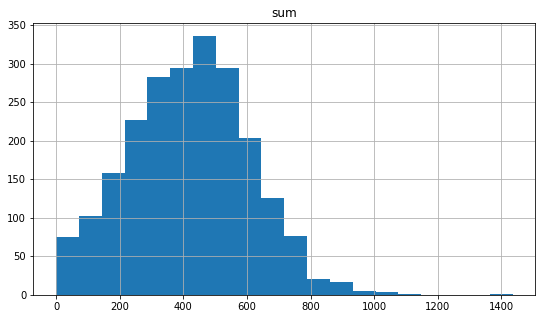

In [53]:
smart_call_stat.hist('sum', figsize=(9,5), bins=20);

Распределение на гистограмме условно можно назвать нормальным, большая часть значений лежит в промежутке который был рассчитан выше.
Большенство пользователей тарифа `Smart`  от 300 до 580 минут в месяц. 

In [54]:
ultra_call_stat = call_stats.query('tariff == "ultra"')
ultra_call_stat_gb = ultra_call_stat.groupby('call_in_mounth')['sum'].agg('mean')

In [55]:
info(ultra_call_stat_gb);

Среднее равно:  511.23471423122083
Дисперсия равна:  7185.123007600402
Стандартное отклонение равно:  84.76510489346664


In [56]:
sigma(ultra_call_stat_gb)

(256.9393995508209, 765.5300289116208)

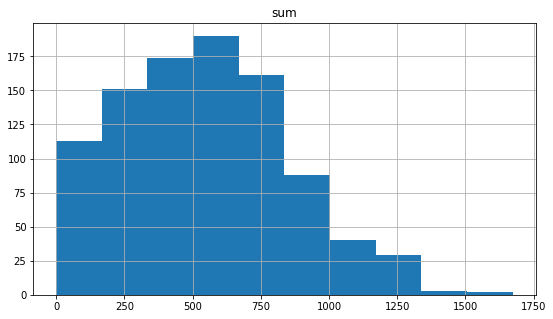

In [57]:
ultra_call_stat.hist('sum', figsize=(9,5));

In [58]:
print('Максимально значение израсходованных минут:', max(ultra_call_stat['sum']))

Максимально значение израсходованных минут: 1673.0


Распределение скошенно вправо. Это говорит о том, что среднее больше медианны, значит есть значения которые влияют на среднее. Основная масса пользователей используют от 500 до 650 минут в месяц.

**Пользователи `Smart` используют минут в месяц немного меньше чем пользователи `Ultra`, видимо `Ultra` выбирают не из-за колличества минут, так как подовляющие большенство пользователй не тратят 30к минут на разговоры, не смотря на то что небольшое количество пользователей проговаривают больше половины минут от тарифа, тех кто достигает лимита нету.**

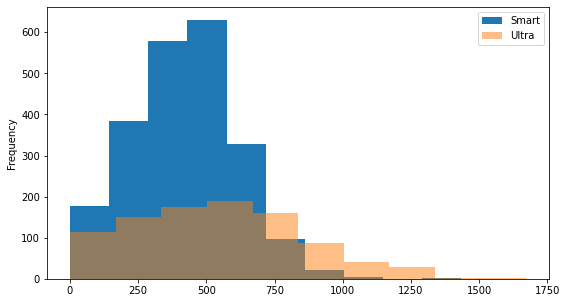

In [59]:
smart_call_stat['sum'].plot(kind='hist', figsize=(9,5),label='Smart');
ultra_call_stat['sum'].plot(kind='hist', figsize=(9,5), alpha=0.5,label='Ultra');
plt.legend()

#### Сообщения

In [60]:
smart_message_stat = message_stat.query('tariff == "smart"')
smart_message_stat_gp = smart_message_stat.groupby('sms_in_month')['mes_count'].agg('mean')

In [61]:
info(smart_message_stat_gp);

Среднее равно:  36.2627302785857
Дисперсия равна:  38.80668503759196
Стандартное отклонение равно:  6.229501186900277


In [62]:
sigma(smart_message_stat_gp)

(17.57422671788487, 54.95123383928653)

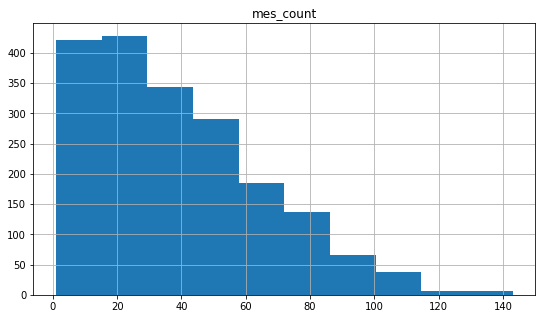

In [63]:
smart_message_stat.hist('mes_count', figsize=(9,5));

Гистограмма скошена вправо, в основном пользователи тратят до 50 сообщений которые входят в тариф, но так же есть много тех которые превышают лимит, тем самым принося доход компании. 

In [64]:
ultra_message_stat = message_stat.query('tariff == "ultra"')
ultra_message_stat_gp = ultra_message_stat.groupby('sms_in_month')['mes_count'].agg('mean')

In [65]:
info(ultra_message_stat_gp);

Среднее равно:  55.169628669643124
Дисперсия равна:  145.0245868769887
Стандартное отклонение равно:  12.042615450017022


In [66]:
sigma(ultra_message_stat_gp)

(19.04178231959206, 91.29747501969419)

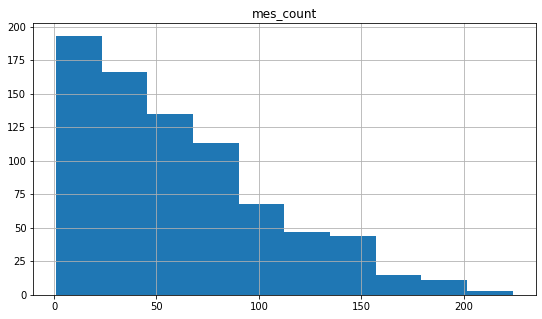

In [67]:
ultra_message_stat.hist('mes_count', figsize=(9,5));

In [68]:
print('Максимально колличество отправленных сообщений :', max(ultra_message_stat['mes_count']))

Максимально колличество отправленных сообщений : 224


**Подавляющие большенство пользователей `Ultra` тратят меньше смс чем пользователи `Smart`, есть пользователи которые тратят больше, но лимита в 1к смс ни кто**

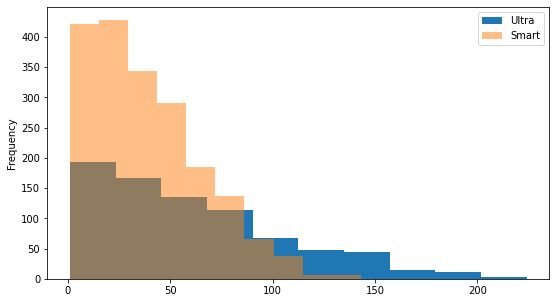

In [69]:
ultra_message_stat['mes_count'].plot(kind='hist', figsize=(9,5), label='Ultra')
smart_message_stat['mes_count'].plot(kind='hist', figsize=(9,5), alpha=0.5, label='Smart')
plt.legend();

#### Интернет

In [70]:
internet_stats.rename(columns={'mb_used': 'gb_used'}, inplace=True) # Переименуем колонку так как у нас гб 

In [71]:
internet_stats.head()

,tariff,user_id,mb_per_month_included,rub_per_gb,rub_monthly_fee,internet_month,city,gb_used,over_gb
1,smart,1001,15360,200,550,11,Москва,18452.0,3.019531
2,smart,1001,15360,200,550,12,Москва,14053.0,-1.276367
4,smart,1002,15360,200,550,6,Стерлитамак,10871.0,-4.383789
5,smart,1002,15360,200,550,7,Стерлитамак,17601.0,2.188477
6,smart,1002,15360,200,550,8,Стерлитамак,20347.0,4.870117


In [72]:
smart_internet_stats = internet_stats.query('tariff == "smart"')
smart_internet_stats_gb = smart_internet_stats.groupby('internet_month')['gb_used'].agg('mean')

In [73]:
info(smart_internet_stats_gb);

Среднее равно:  15088.385850899236
Дисперсия равна:  7192652.732365346
Стандартное отклонение равно:  2681.9121410600583


In [74]:
sigma(smart_internet_stats_gb)

(7042.649427719061, 23134.12227407941)

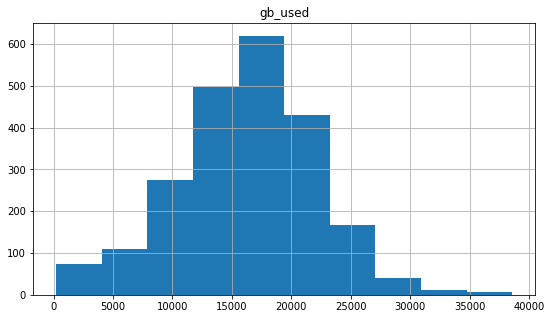

In [75]:
smart_internet_stats.hist('gb_used', figsize=(9,5));

Видим нормальное расспределение, на граффике видно что примерно половина придерживается рамок тарифа, но вторая половина пользователей докупают трафик.

In [76]:
ultra_internet_stats = internet_stats.query('tariff == "ultra"')
ultra_internet_stats_gb = ultra_internet_stats.groupby('internet_month')['gb_used'].agg('mean')

In [77]:
info(ultra_internet_stats_gb);

Среднее равно:  18468.530518256368
Дисперсия равна:  8298745.389709667
Стандартное отклонение равно:  2880.754309154057


In [78]:
sigma(ultra_internet_stats_gb)

(9826.267590794198, 27110.79344571854)

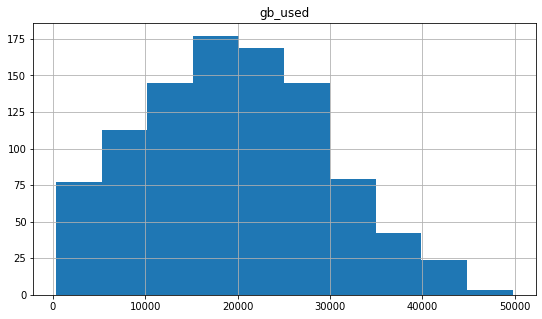

In [79]:
ultra_internet_stats.hist('gb_used', figsize=(9,5));

In [80]:
ultra_internet_stats['user_id'].count()

974

In [81]:
smart_internet_stats['user_id'].count()

2227

Вот и ответ за что люди покупают тариф `ultra`, резкая просадка на 30к показывает что подавляющие большенство пользователей это те кто покупают этот тариф ради большего трафика на интернет и только, так как по предыдушим анализам этого тарифа пользователи не достигали лимита. 

**Пользователи тарифа `smart` используют минуты и смс чуть меньше чем пользователи `ultra`, однако половина пользователей `smart` докупает себе трафик в интерент. Полльзователи тарифа `ultra` активнее используют интернет и из анализа становится что это основной параметр для пользователей**

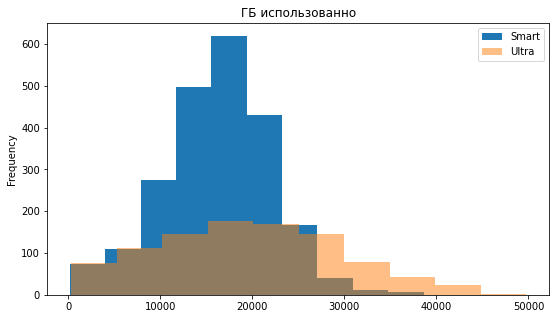

In [82]:
smart_internet_stats['gb_used'].plot(kind='hist', figsize=(9,5), label='Smart');
ultra_internet_stats['gb_used'].plot(kind='hist', figsize=(9,5), alpha=0.5, label='Ultra');
plt.legend()
plt.title('ГБ использованно');

# Гипотезы



## 1.   Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;



Сформулируем нулевую и альтернативную гипотезы

* H₀ - средняя выручка пользователей тарифов «Ultra» и «Smart» равна
* H₁ - средняя выручка пользователей тарифов «Ultra» и «Smart» не равна




In [83]:
#Зададим критический уровень статистической значимости
alpha = .05

In [84]:
results = st.ttest_ind(
    smart_revenue['revenue_rub'],
    ultra_revenue['revenue_rub']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:                  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя тарифа smart: ', round(smart_revenue['revenue_rub'].mean(),1))
print('Средняя выручка в месяц с пользователя тарифа ultra: ', round(ultra_revenue['revenue_rub'].mean(),1))

p-значение: 3.0908544414858797e-12
Отвергаем нулевую гипотезу

Средняя выручка в месяц с пользователя тарифа smart:  1677.4
Средняя выручка в месяц с пользователя тарифа ultra:  2196.6


**Отвергаем первую гипотезу так как разница есть между выручкой не смотря на то что тариф `Smart` берут в 2 раза реже.**

## 2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Формулируем нулевую и альтернативные гипотезы.

* H₀ - средняя выручка пользователей из Москвы и остальных регионов равна
* H₁ - средняя выручка пользователей из Москвы и остальных регионов не равна

In [86]:
from_Moscow = final_revenue.query('city == "Москва"')
not_from_Moscow = final_revenue.query('city != "Москва"')

In [87]:
results = st.ttest_ind(
    from_Moscow['revenue_rub'],
    not_from_Moscow['revenue_rub']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя из Москвы', round(from_Moscow['revenue_rub'].mean(),1))
print('Средняя выручка в месяц с пользователя не из Москвы', round(not_from_Moscow['revenue_rub'].mean(),1))

p-значение: 0.37398979581519365
Не получилось отвергнуть нулевую гипотезу

Средняя выручка в месяц с пользователя из Москвы 1769.7
Средняя выручка в месяц с пользователя не из Москвы 1847.5


**Вторую гипотезу отвергнуть не удалось - выручка с пользователей из москвы и пользователей из других регионов почти равна.**

Вывод:

Проверили 2 гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - отвергнуть не удалось


# Общий вывод:

В ходе работы:

1. Ознакомились с данными, очистили, изменили тип данных и объеденили таблицы.

2. Произвели рассчеты выручки для каждого пользователя. 

3. Выяснили, что пользователи `smart` тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи `ultra`. Лимита на звонки и минуты в `ultra` в среднем не достигает никто. При этом интернетом пользователи `ultra` пользуются гораздо активнее. Скорее всего, пользователи `ultra` выбирают этот тариф из-за большего интернет-трафика.

4. Проверили 2 гипотезы:
  - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются **Отвергли**
  - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. **Отвергнуть не удалось**


Отвечаем навопрос какой тариф лучший - лучший в глазах компании, это тот который принсоит больше прибыли таким является тариф **Ultra** так как средняя выручка от него ставила  **2196.6**, однако так же стало очевидно то что тариф **Smart** пользуеться популярностью среди абонентов его выбирают практически в 2 раза больше по сравнению с **Ultra**, однако 50% пользователей **Smart** докупает себе траффик интернета и даже при таких условиях он не приносит больше чем **Ultra**. 
 Исходя из этой информации я бы рекомендовал компании пересмотреть свой тарифный план, так как их пользователи не эффективно используют свои тарифные планы, как выяснилось в ходе анализа, мало кто из пользователей обоих тарифов достигает своего лимита в чем-то кроме использования интернета.
 
 Я бы пересмотрел так:
 1. Тариф в котором собранны все усредненые показатели тарифа (средние колличество минут, средне смс, средне интернет)
 2. Тариф имеющий напрвленность на интернет ( средние колличество минут, минимум смс, максимум интернет)
 3. Тариф с максимальным пакетом услуг. 

на 2й тариф сделать цену немного больше чем на 1й, так у пользователей будет больше выбора соответвенне услуги станут удобнее, что привлечет доп. клиентов и прибыль повыситься или оператор сможет сохранить прибыль которую он уже имеет.


